<a href="https://colab.research.google.com/github/Sathvika-891/MINI-Project/blob/main/all_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linking data from drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import time
print(int(time.time()*1000))

1664166811225


In [ ]:
from time import time
start=time()
import numpy as np
import os
import cv2
from sklearn.utils import shuffle 
from tqdm import tqdm
from sklearn import preprocessing#to encode labels
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from keras.preprocessing import image
end=time()
d=start-end
d_ms=int(d*1000)
print(f"Time to load packages: {d_ms}")


Time to load packages: -2580


In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
def load_data():
    datasets = ['/content/drive/MyDrive/graph/data/seg_train/seg_train2','/content/drive/MyDrive/graph/data/seg_test/seg_test2']
    
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))
    return output
print("OK")   

OK


In [ ]:
#loading the dataset into train images and test images list
#lists returned by load_data() function
(train_images, train_labels), (test_images, test_labels) = load_data()
print(test_images.shape)

Loading /content/drive/MyDrive/graph/data/seg_train/seg_train2


100%|██████████| 500/500 [00:04<00:00, 104.71it/s]


Loading /content/drive/MyDrive/graph/data/seg_test/seg_test2


100%|██████████| 100/100 [00:00<00:00, 100.26it/s]

(611, 150, 150, 3)


In [ ]:
#random state=None gives different shuffle in different execution
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
test_images, test_labels = shuffle(test_images, test_labels, random_state=25)
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]
print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3000
Number of testing examples: 611
Each image is of size: (150, 150)


In [ ]:
# def required_vars():
#   train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
#   test_images, test_labels = shuffle(test_images, test_labels, random_state=25)
#   #converting into numpy data
#   #labels encoding
#   le=preprocessing.LabelEncoder()
#   le.fit(train_labels)
#   train_labels_encoded=le.transform(train_labels)
#   le.fit(test_labels)
#   test_labels_encoded=le.transform(test_labels)
#   train_images=np.array(train_images,np.int32)
#   test_images=np.array(test_images,np.int32)
#   #split data into test and train
#   x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded
#   #scaling pixels b/w 0 to 1
#   x_train,x_test=x_train/255.0,x_test/255.0
#   l=[x_train,y_train,x_test,y_test]
#   return l


In [ ]:
#converting into numpy data
train_images=np.array(train_images,np.int32)
test_images=np.array(test_images,np.int32)

In [ ]:
#Encoding the labels from text to integer
le=preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)
print(train_labels_encoded)
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
print(test_labels_encoded)

[2 5 2 ... 1 3 2]
[0 1 5 3 5 2 1 4 5 1 0 1 2 3 4 5 0 2 1 3 4 0 5 0 2 3 1 5 1 1 2 3 4 1 5 1 4
 2 3 4 0 0 5 0 2 2 4 5 2 2 0 0 1 1 0 4 4 0 5 5 4 5 5 4 5 2 4 3 1 4 1 2 5 3
 5 4 1 0 3 3 0 5 5 5 2 4 4 2 4 4 2 4 5 0 3 4 4 5 4 0 4 4 5 2 0 1 2 5 4 3 4
 2 0 0 0 3 4 2 3 5 0 0 5 2 3 1 3 3 5 1 3 5 3 2 3 5 5 1 2 0 5 0 2 3 0 3 4 5
 3 2 3 4 3 0 2 4 3 4 5 1 2 0 3 5 1 3 0 1 5 0 3 5 3 2 3 2 3 1 0 0 3 0 4 5 2
 3 0 2 1 0 3 5 0 5 0 1 5 5 5 2 2 1 2 2 0 4 2 2 0 4 2 5 1 0 5 4 1 2 3 3 2 1
 4 3 2 1 3 2 4 3 2 3 4 4 1 0 1 5 3 0 1 4 0 0 3 4 1 0 5 5 3 1 2 3 1 4 0 4 4
 5 4 2 5 1 1 1 4 5 0 5 4 0 5 3 5 2 5 3 5 3 5 3 4 0 2 1 0 5 5 0 4 4 4 1 3 4
 1 4 2 5 0 5 1 3 2 0 0 4 4 1 0 0 0 2 5 1 5 3 4 3 2 3 1 3 3 4 3 1 0 4 3 0 3
 5 1 2 5 0 1 3 1 1 0 2 2 1 1 5 4 4 1 5 2 3 5 3 3 2 1 1 3 0 2 3 1 3 5 5 4 4
 4 0 0 2 2 2 5 2 0 3 1 5 3 0 1 0 4 3 3 3 2 3 3 1 5 1 5 4 4 2 3 4 5 1 5 0 3
 4 2 1 1 5 4 3 0 5 1 0 4 2 4 3 2 3 4 4 4 1 3 1 1 4 3 4 1 5 4 2 3 3 5 3 1 2
 5 1 4 4 2 0 2 2 4 2 0 5 1 2 0 2 1 2 3 1 3 0 5 1 4 1 5 1 3 2 1 0 0 0 5 3 0
 0 1 3 

In [ ]:
#split data into test and train
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded
#scaling pixels b/w 0 to 1
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)
# print(x_train)


(3000, 150, 150, 3)


In [ ]:
n_images,nx,ny,val=x_train.shape
train_dataset = x_train.reshape((n_images,nx*ny*val))
print(train_dataset.shape)


(3000, 67500)


In [ ]:
n_images,nx,ny,val=x_test.shape
# print(x_test.shape)
test_dataset = x_test.reshape((n_images,nx*ny*val))
print(test_dataset.shape)

(611, 67500)


In [ ]:
from datetime import datetime
def fun():
    
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
    directory=r'/content/drive/MyDrive/graph/data/seg_train/seg_train2',
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=32,
      class_mode="categorical",
      shuffle=True,
      seed=42)
    test_generator = train_datagen.flow_from_directory(
    directory=r'/content/drive/MyDrive/graph/data/seg_test/seg_test2',
      target_size=(224, 224),
      color_mode="rgb",
      batch_size=32,
      shuffle=False,
      class_mode="categorical",
      seed=42)
    from tensorflow.keras.applications import InceptionV3 
    from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
    incep = InceptionV3(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

    for layer in incep.layers:
        layer.trainable = False


    from tensorflow.keras import layers
    x = layers.Flatten()(incep.output)

    prediction = layers.Dense(units = 6, activation="softmax")(x)

    model = tf.keras.models.Model(inputs = incep.input, outputs=prediction)

    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
    mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

    start=time()

    result = model.fit_generator(train_generator,validation_data=test_generator,callbacks=[earlyStopping, mcp_save, reduce_lr_loss], epochs = 10, steps_per_epoch=len(train_generator))

    print("Time ",datetime.now()-start)

    model.save('/content/model_final.hdf5')

    prediction = model.predict_generator(test_generator,verbose=1,steps=len(train_generator)*10)

    predicted_class = np.argmax(prediction,axis=1)

    train_generator.class_indices.items()

    l = dict((v,k) for k,v in train_generator.class_indices.items())
    prednames = [l[k] for k in predicted_class]

    filenames = test_generator.filenames

    import pandas as pd
    finaldf = pd.DataFrame({'Filename': filenames,'Prediction': prednames})

    from sklearn.metrics import accuracy_score
    y_true = []
    for i in finaldf['Filename']:
        y_true.append(i.split('/')[0])
        output_1 = []
    for i in y_true:
        output_1.append(train_generator.class_indices[i])

    print("accuracy = ",accuracy_score(predicted_class,output_1)*100)
    
    from sklearn import metrics
    import pandas as pd
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    true_labels = test_generator.classes
    predictions = model.predict_generator(test_generator)

    y_true = true_labels
    y_pred = np.array([np.argmax(x) for x in predictions])
    end=time()
    d=start-end
    d_ms=int(d*1000)
    print(f"Running time of Inception V3: {d_ms}")
    print_confusion_matrix(true_labels,y_pred)
    predict_with(model)

In [ ]:
from PIL import Image
from numpy import asarray
def show_few_images(ytest,pred):
  fig=plt.figure(figsize=(30,30))
  fig.suptitle("random 25 images")
  count=0
  for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i])
        d={"Actual":class_names[ytest[i]],"Predicted":class_names[pred[i]]}
        plt.xlabel(d)
        if(class_names[ytest[i]]==class_names[pred[i]]):
          count+=1
  plt.show()
  pwd_strength=count/25
  err_rate=(25-count)/25
  print("Password strength=",pwd_strength*100)
  print("Error rate=",err_rate*100)

  


In [ ]:
def print_confusion_matrix(ytest,y_pre):
  cm = confusion_matrix(ytest,y_pre)
  print(metrics.classification_report(ytest,y_pre))
  cm_df = pd.DataFrame(cm,
                     index = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'], 
                     columns = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'])
  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print()

In [ ]:
def predict_with(model):
  start=time()
  print("Trying to predict with new image")
  img=image.load_img("/content/glacier.jpg",target_size=(150,150,3))
  img=np.array(img,np.int32)
  print("Actual image")
  plt.imshow(img)
  img=np.expand_dims(img,axis=0)
  n_images,nx,ny,val=img.shape
  xtestnew=img.reshape((n_images,nx*ny*val))
  pred_new=model.predict(xtestnew)#predicting with model
  print("Predicted label:",class_names[pred_new[0]])
  end=time()
  d=end-start
  d_ms=int(d*1000)
  print("Guessing time",d_ms)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
import datetime
from datetime import datetime
# from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
import cv2
import numpy as np

def model_with(model_name,xtrain,xtest,ytrain,ytest):
  print("Modelling with",model_name)
  start=time()
  print()
  if(model_name == "Random Forest Classifier"):
    model2 = RandomForestClassifier(n_estimators= 1000,)
  elif(model_name == "Extra Trees Classifier"):
    model2 = ExtraTreesClassifier(n_estimators=1000,)
  elif(model_name=="Gaussian Naive Basian"):
    model2=GaussianNB() #no estimators as its probability model(mathematical so no need to iterate)    
  elif(model_name=="Gradient Boost Classfier"):
      model2=GradientBoostingClassifier(learning_rate=0.1)
  elif(model_name=="Light GBM"):
      model2 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
  else:
    print("Model not found in function")
  model2.fit(xtrain,ytrain)
  pred=model2.predict(xtest)
  end=time()
  d=end-start
  d_ms=int(d*1000)
  print("Running time of",model_name)
  print(d_ms)
  print_confusion_matrix(ytest,pred)
  show_few_images(ytest,pred)
  predict_with(model2)
  

Modelling with Gaussian Naive Basian

Running time of Gaussian Naive Basian
2440
              precision    recall  f1-score   support

           0       0.44      0.64      0.52       100
           1       0.50      0.45      0.47       100
           2       0.42      0.51      0.46       100
           3       0.50      0.24      0.33       111
           4       0.34      0.20      0.25       100
           5       0.53      0.75      0.62       100

    accuracy                           0.46       611
   macro avg       0.46      0.47      0.44       611
weighted avg       0.46      0.46      0.44       611



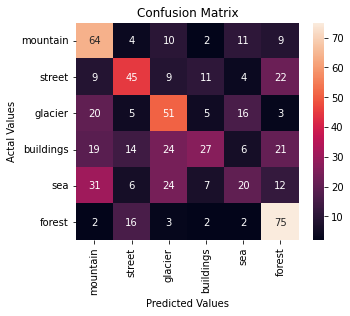

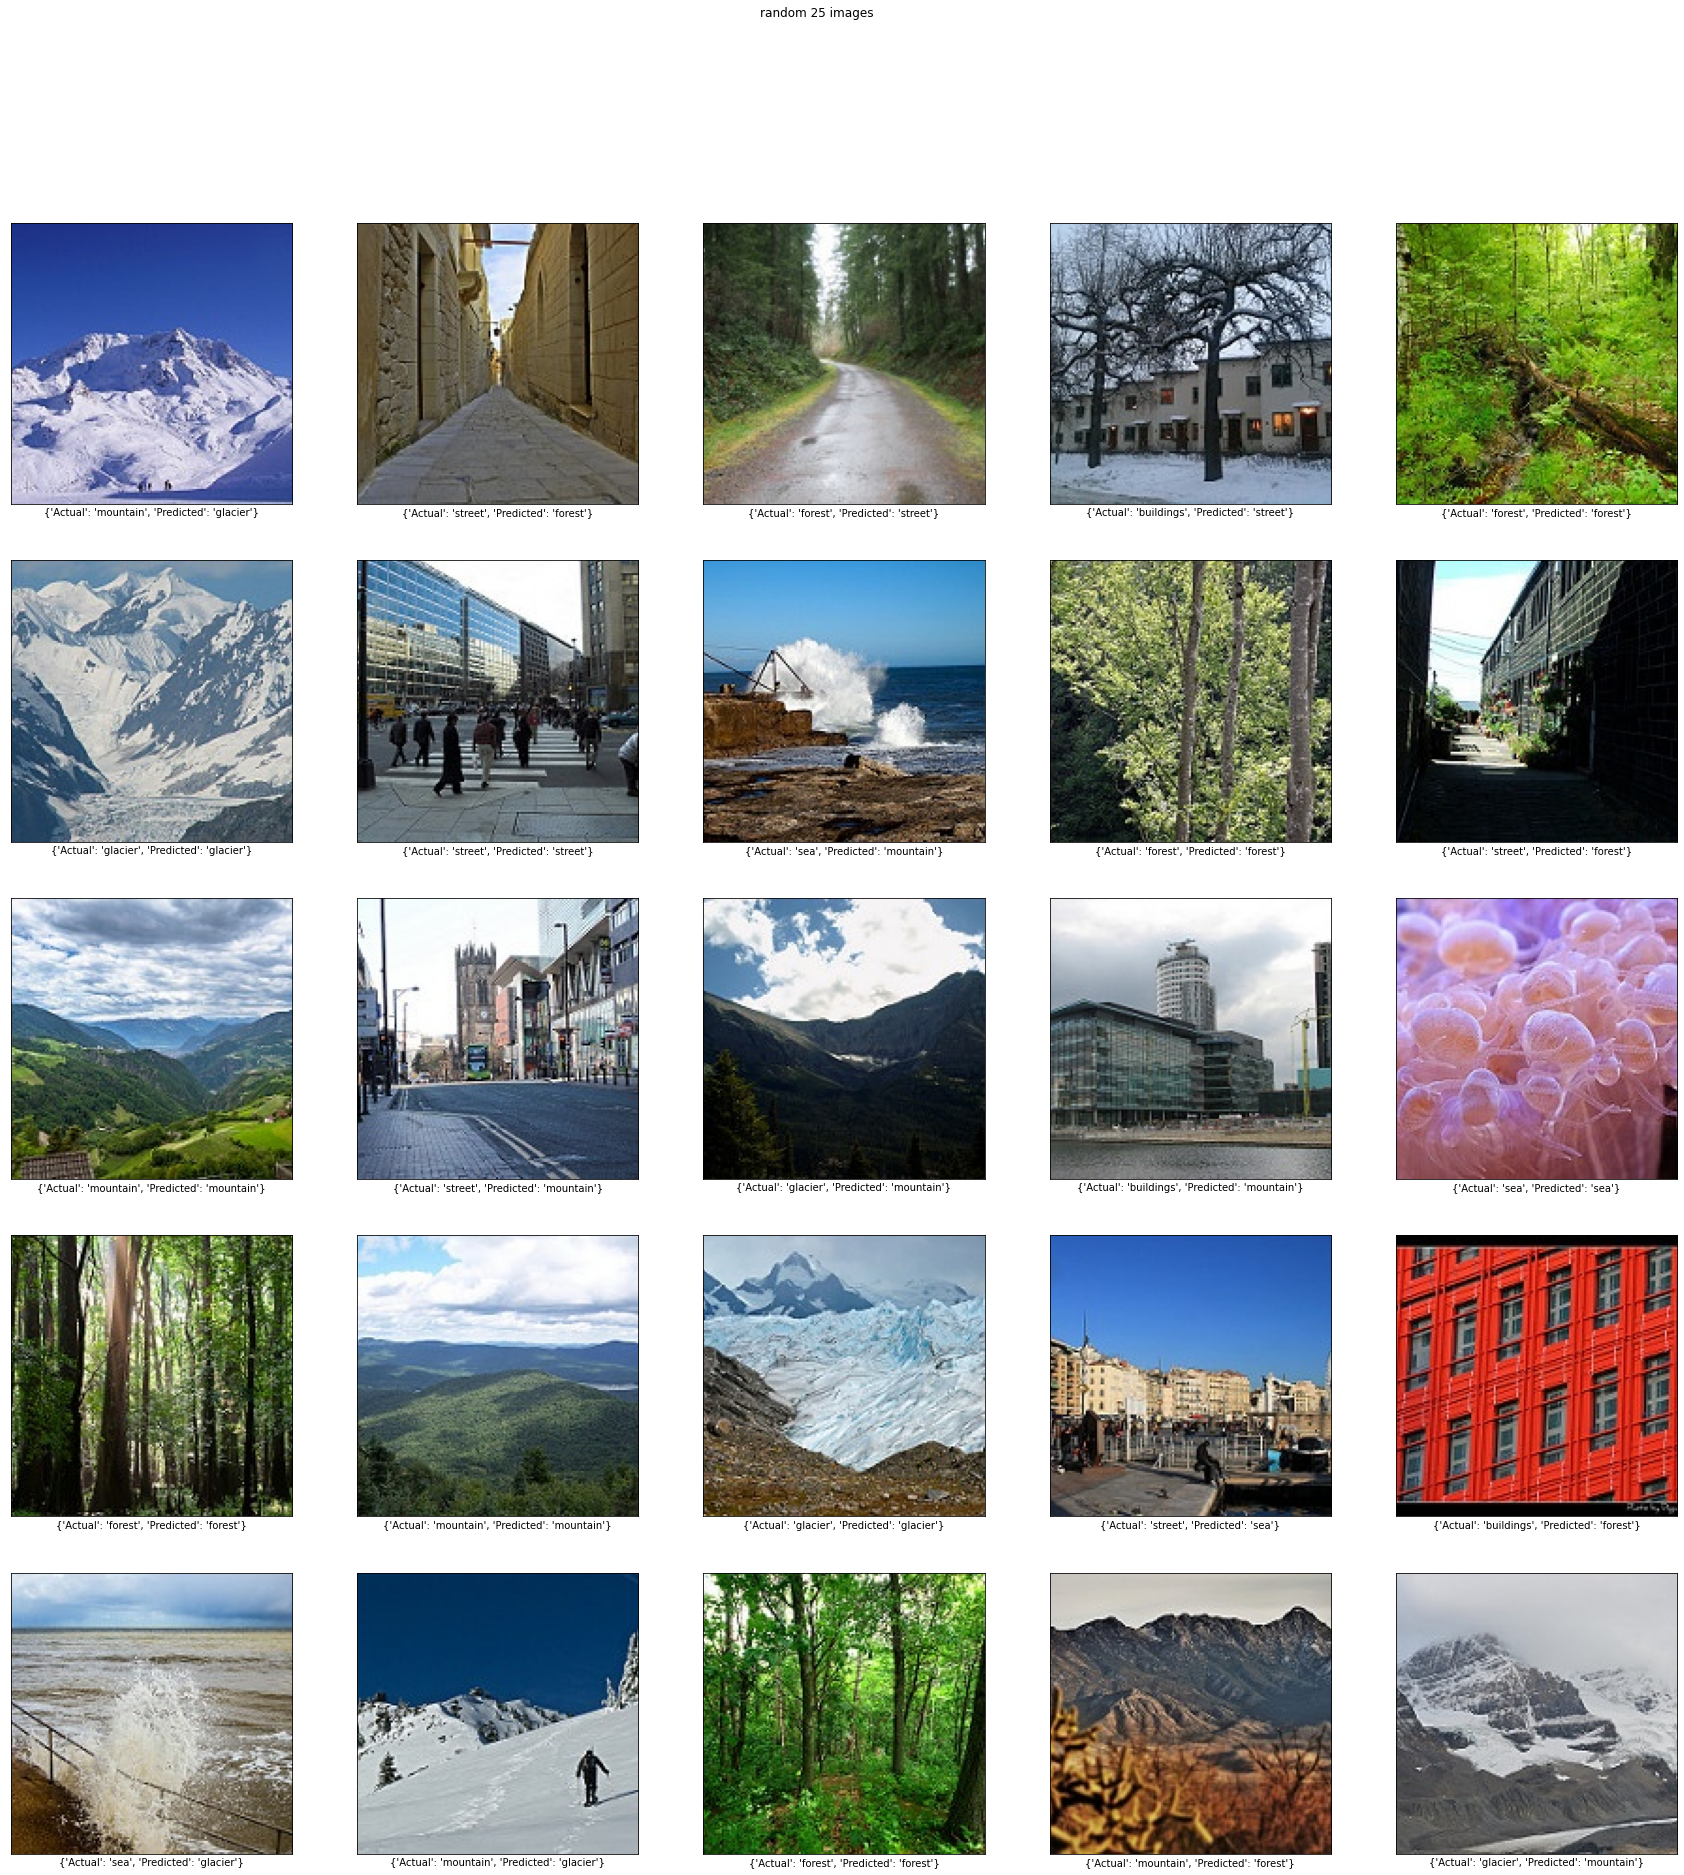

Password strength= 40.0
Error rate= 60.0
Trying to predict with new image
Actual image
Predicted label: buildings
Guessing time 32
........................................................................................
Modelling with Extra Trees Classifier

Running time of Extra Trees Classifier
157235
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       100
           1       0.63      0.64      0.63       100
           2       0.51      0.55      0.53       100
           3       0.54      0.38      0.44       111
           4       0.49      0.41      0.45       100
           5       0.61      0.83      0.70       100

    accuracy                           0.57       611
   macro avg       0.56      0.57      0.56       611
weighted avg       0.56      0.57      0.56       611



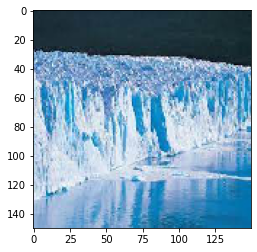

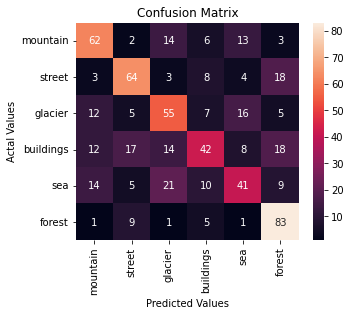

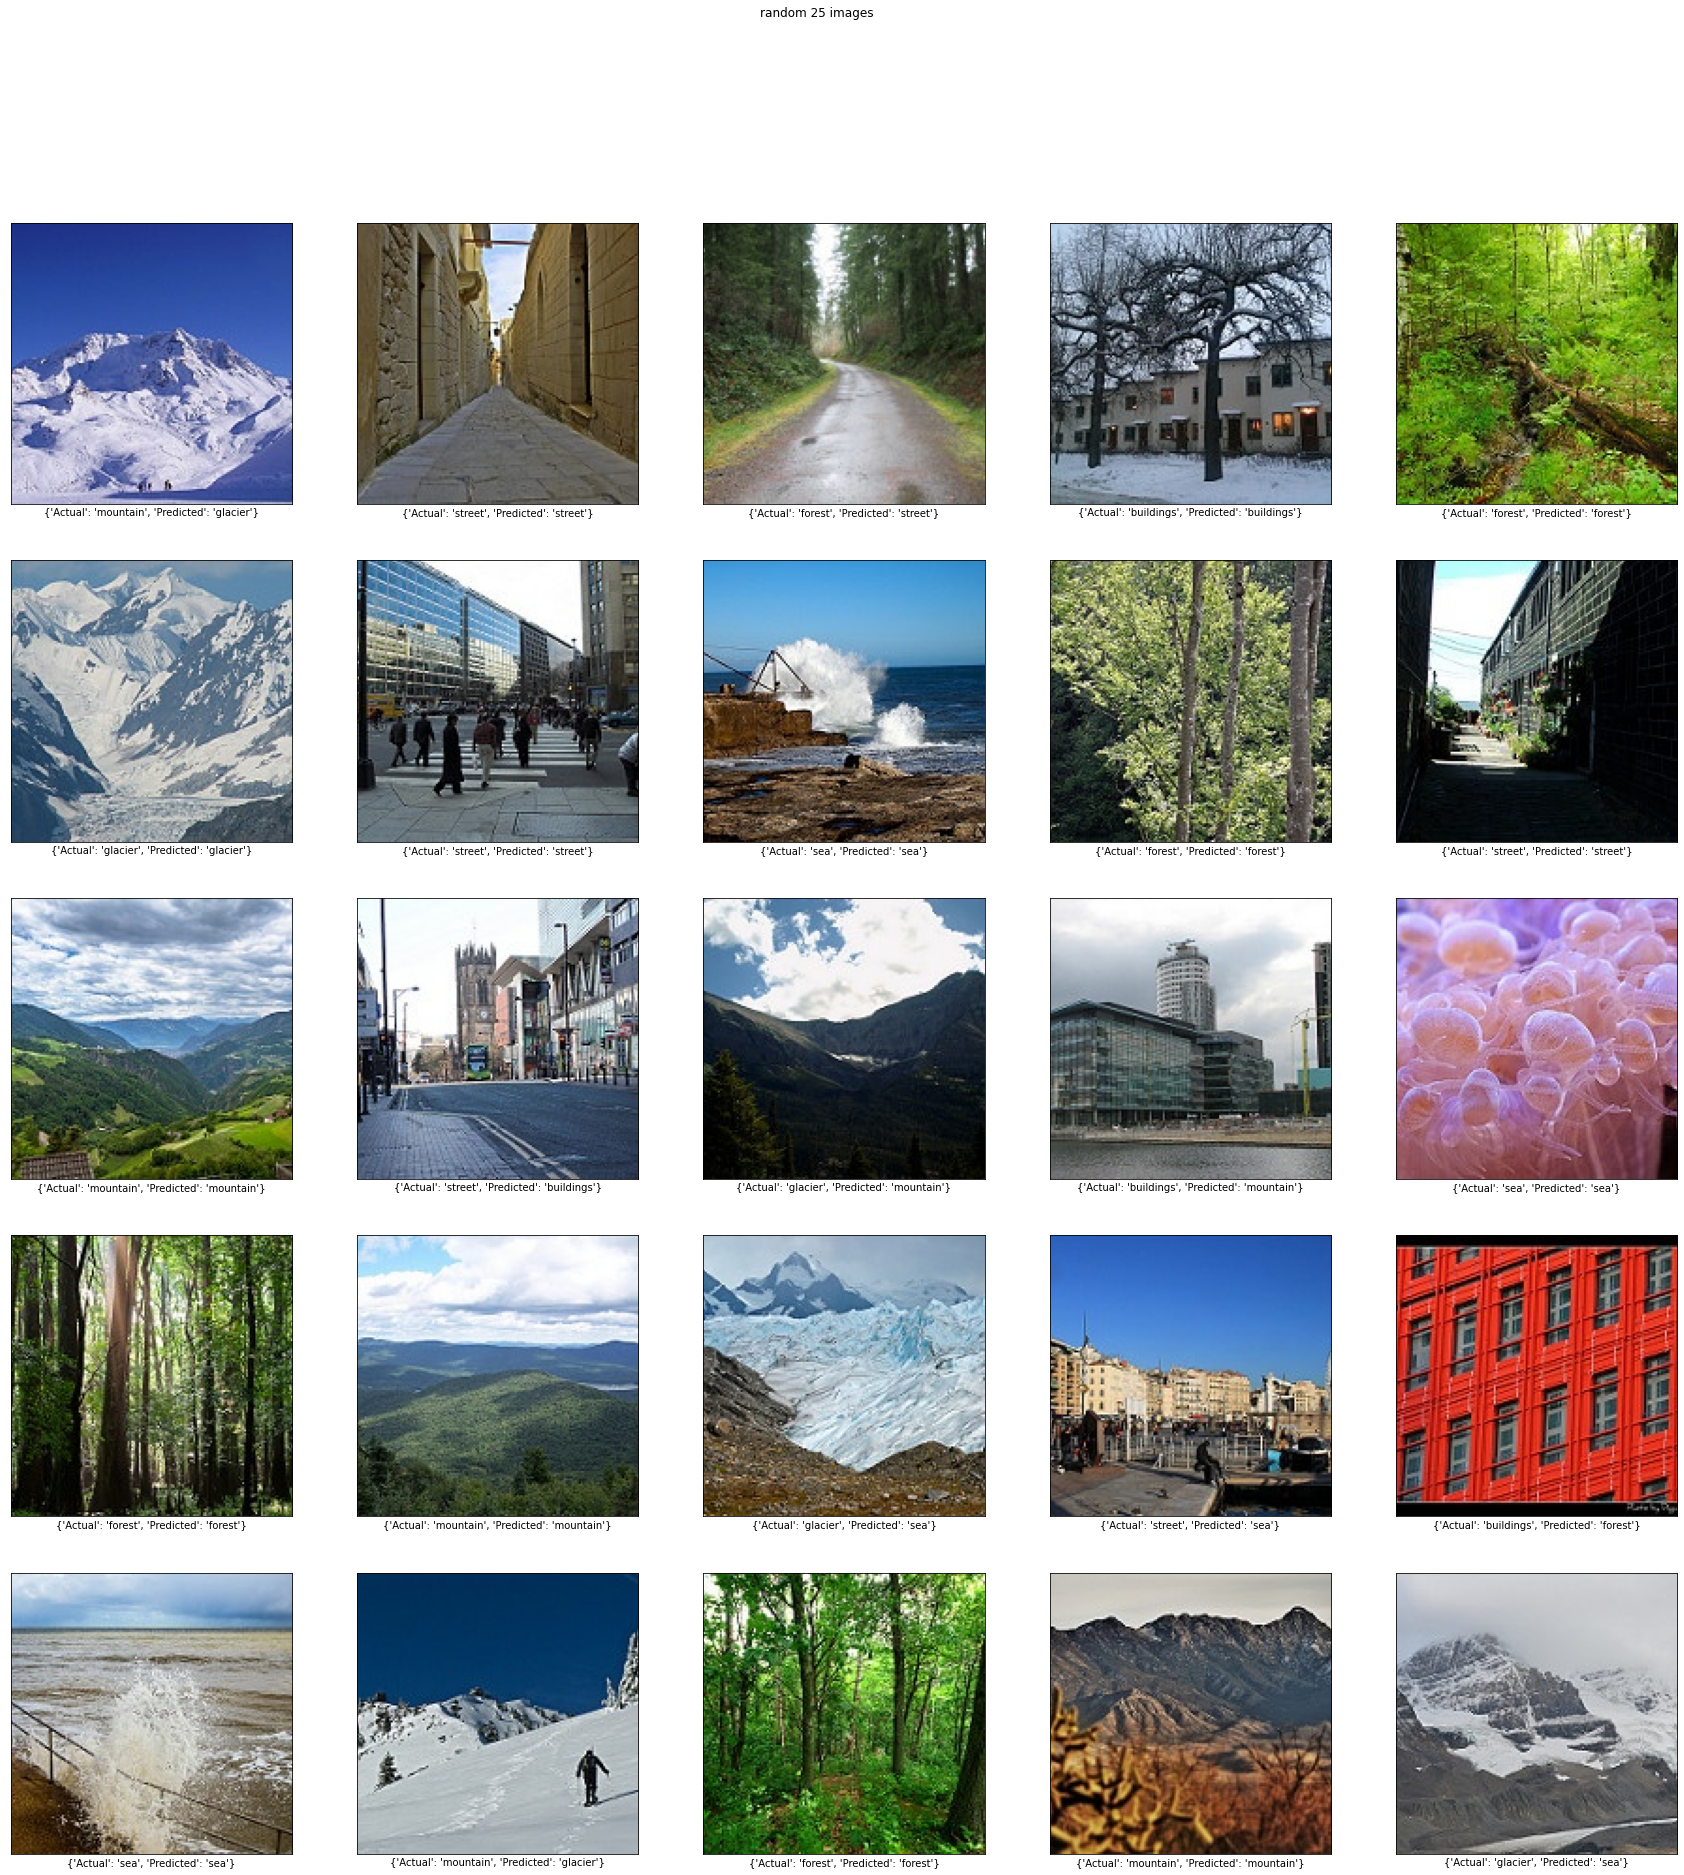

Password strength= 60.0
Error rate= 40.0
Trying to predict with new image
Actual image
Predicted label: glacier
Guessing time 125
........................................................................................
Modelling with Gradient Boost Classfier



In [ ]:
models = [
             "Gaussian Naive Basian",
           "Extra Trees Classifier",
          # "Inception",
          #  "Gradient Boost Classfier",
           "Random Forest Classifier",
            "Light GBM"

]
# shuffling test dataset inorder to find the passwords strength
for i in models:
  if(i=="Inception"):
      fun()
  else:
    model_with(i,train_dataset,test_dataset,y_train,y_test)
    print("........................................................................................")